<a href="https://colab.research.google.com/github/a4m123/MastersDegree/blob/main/8%D0%92%D0%9C22_%D0%9C%D0%B0%D0%BB%D0%BA%D0%B8%D0%BD_%D0%A1%D0%9F%D0%9F3(%D1%86%D0%B8%D1%84%D1%80%D1%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #проверяем свои изображения
import numpy as np
import sys

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.int64) # изображение рукописной цифры
x_train = (x_train) / 255
y_train = y_train.astype(np.int64) # символ цифры
x_test = x_test.astype(np.int64) # изображение рукописной цифры 
x_test = (x_test) / 255
y_test = y_test.astype(np.int64) # символ цифры

testAmount = 10000 # тестовая выборка
trainAmount = 60000 # обучающая выборка

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
class NN:
    def __init__(self, rate, inputs, hiddens, outputs):
        self.rate = rate
        self.inputs = inputs + 1
        self.hiddens = hiddens
        self.outputs = outputs
        self.wih = np.random.rand(self.hiddens, self.inputs) - 0.5
        self.who = np.random.rand(self.outputs, self.hiddens) - 0.5
        self.activationFunction = lambda x: 1 / (1 + np.exp(-x))
    
    def train(self, inputsList, targets_list):
        inputsList = np.concatenate((inputsList, [1]), axis=0)
        inputs = np.transpose(np.array(inputsList, ndmin=2))
        targets = np.transpose(np.array(targets_list, ndmin=2))
        hiddenResults = self.activationFunction(np.dot(self.wih, inputs))
        outputResults = self.activationFunction(np.dot(self.who, hiddenResults))
        outputErrors = targets - outputResults
        hiddenErrors = np.dot(np.transpose(self.who), outputErrors)
        self.who = self.who + self.rate * np.dot((outputErrors * outputResults * (1.0 - outputResults)), np.transpose(hiddenResults))
        self.wih = self.wih + self.rate * np.dot((hiddenErrors * hiddenResults * (1.0 - hiddenResults)), np.transpose(inputs))

    def query(self, inputsList):
        inputsList = np.concatenate((inputsList, [1]), axis=0)
        inputs = np.transpose(np.array(inputsList, ndmin=2))
        hiddenResults = self.activationFunction(np.dot(self.wih, inputs))
        outputResults = self.activationFunction(np.dot(self.who, hiddenResults))
        return outputResults
    
    def setLearningRate(self, rate):
        self.rate = rate

In [ ]:
NN1 = NN(0.1, 784, 50, 10)

In [ ]:
def train(n):
    target = np.zeros(10)
    target[y_train[n]] = 1
    query = np.array(x_train[n]).reshape(784)
    NN1.train(query, target)

def test(n):
    query = np.array(x_test[n]).reshape(784)
    return NN1.query(query)

def epochTrain():
    for i in range(trainAmount):
        train(i)
        sys.stdout.write("Обучение: %s\r" %i)
        sys.stdout.flush()


In [ ]:
epochTrain()

In [ ]:
def epochTest():
    incorrect = []
    precision = 0
    for i in range(testAmount):
        answer = test(i)
        if (answer.argmax() == y_test[i]):
            precision += 1
        else:
            incorrect.append(i)
    return precision / testAmount, incorrect

In [ ]:
accuracy, incorrectList = epochTest()
print("точность = ", accuracy)


точность =  0.9376


In [ ]:
print(incorrectList)

[8, 33, 38, 92, 111, 124, 149, 172, 175, 217, 233, 241, 247, 259, 282, 290, 300, 318, 321, 340, 352, 406, 412, 444, 445, 478, 479, 495, 507, 543, 547, 551, 565, 571, 578, 582, 583, 591, 605, 610, 613, 619, 628, 629, 646, 658, 659, 684, 689, 691, 707, 717, 720, 740, 741, 810, 844, 874, 881, 898, 926, 938, 939, 944, 947, 950, 951, 956, 959, 965, 975, 998, 1003, 1012, 1014, 1032, 1039, 1044, 1062, 1068, 1073, 1096, 1107, 1112, 1114, 1119, 1173, 1181, 1191, 1192, 1194, 1198, 1204, 1206, 1226, 1232, 1242, 1243, 1247, 1252, 1260, 1283, 1289, 1299, 1319, 1326, 1328, 1378, 1393, 1406, 1433, 1440, 1466, 1467, 1494, 1500, 1522, 1525, 1527, 1530, 1549, 1553, 1571, 1581, 1604, 1609, 1621, 1640, 1641, 1644, 1671, 1678, 1681, 1696, 1709, 1711, 1717, 1718, 1721, 1722, 1741, 1754, 1759, 1772, 1790, 1813, 1828, 1839, 1850, 1855, 1857, 1868, 1871, 1878, 1883, 1899, 1901, 1911, 1930, 1938, 1940, 1941, 1952, 1969, 1970, 1973, 1984, 2001, 2016, 2024, 2035, 2037, 2040, 2043, 2044, 2053, 2063, 2070, 2073, 20

# Смотрим цифры MNIST, пробуем свои

[[5.74160029e-05]
 [5.75526668e-01]
 [2.91302320e-02]
 [1.05907244e-01]
 [5.24567837e-05]
 [6.02367282e-05]
 [2.07836888e-04]
 [6.44746031e-02]
 [7.75125067e-03]
 [7.57732870e-02]]
На изображении цифра: 7
Ответ нейронки:  1
Насколько NN уверена в своём ответе: [0.57552667]
Что NN считает касательно истинного ответа: [0.0644746]
MSE касательно истинного ответа:  [0.87520777]



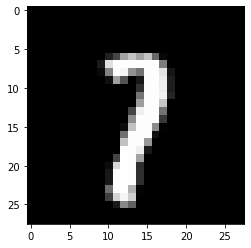

In [ ]:
whatToCheck = 111
queryVector = np.array(x_test[whatToCheck]).reshape(784)
answer = NN1.query(queryVector)
print(answer)
print("На изображении цифра:", y_test[whatToCheck])
print("Ответ нейронки: ", answer.argmax())
print("Насколько NN уверена в своём ответе:",answer[answer.argmax()])
print("Что NN считает касательно истинного ответа:", answer[y_test[whatToCheck]])
print("MSE касательно истинного ответа: ", (answer[y_test[whatToCheck]] - 1) ** 2)
plt.imshow(x_test[whatToCheck], cmap='gray')
print()

площадь квартиры
удалённость от метро
благоустройство

--------------
стоимость 1 м2 (90000 руб)


На изображении цифра: 1 - 0
[[9.89551757e-01]
 [1.01324426e-04]
 [8.21732484e-05]
 [1.71554546e-03]
 [6.85014541e-05]
 [1.07543248e-02]
 [1.00298628e-03]
 [3.05485309e-03]
 [9.67363024e-04]
 [2.42033188e-04]]
Ответ нейронки:  0
Насколько NN уверена в своём ответе: [0.98955176]
Что NN считает касательно истинного ответа: [0.98955176]
MSE касательно истинного ответа:  [0.00010917]

На изображении цифра: 1 - 1
[[9.77463807e-05]
 [2.86020614e-01]
 [4.00533160e-03]
 [3.36215433e-03]
 [1.86984361e-06]
 [1.52920792e-02]
 [7.33494290e-06]
 [4.52366235e-02]
 [4.04068655e-02]
 [2.75875503e-03]]
Ответ нейронки:  1
Насколько NN уверена в своём ответе: [0.28602061]
Что NN считает касательно истинного ответа: [0.28602061]
MSE касательно истинного ответа:  [0.50976656]

На изображении цифра: 1 - 2
[[9.20975119e-04]
 [1.20950847e-03]
 [7.51396356e-01]
 [1.91216121e-01]
 [1.15637082e-05]
 [3.06814703e-03]
 [1.31198532e-05]
 [4.05204938e-04]
 [2.30000480e-03]
 [2.30249145e-05]]
Ответ нейронки:  2
Наскол

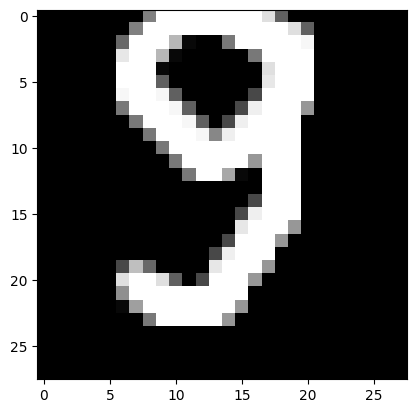

In [ ]:
accuracyOwn = 0
total = 0
for i in range (1, 3):
    for j in range (0, 10):
        total += 1
        answer = list()
        name = 'A:/'+str(i)+'-'+str(j)+'.png'
        image = mpimg.imread(name)
        image = 1 - image[:,:,0]
        queryVector = np.array(image).reshape(784)
        answer = NN1.query(queryVector)
        if (answer.argmax() == j):
            accuracyOwn += 1
        print("На изображении цифра:", i, "-", j)
        print(answer)
        print("Ответ нейронки: ", answer.argmax())
        print("Насколько NN уверена в своём ответе:",answer[answer.argmax()])
        print("Что NN считает касательно истинного ответа:", answer[j])
        print("MSE касательно истинного ответа: ", (answer[j] - 1) ** 2)
        print()
        plt.imshow(image, cmap='gray')
print(accuracyOwn / total)

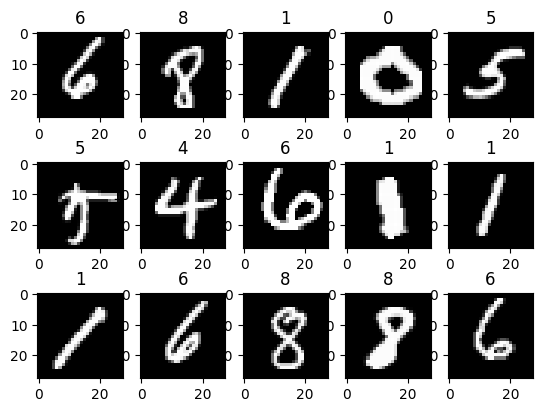

In [ ]:
#plt show 10 train images
for i in range(15):
   number = np.random.randint(0, trainAmount)
   plt.subplot(3, 5, i+1)
   plt.imshow(x_train[number], cmap='gray')
   plt.title(y_train[number])
plt.show()

[0.81231051]
MSE =  0.9923789197111431


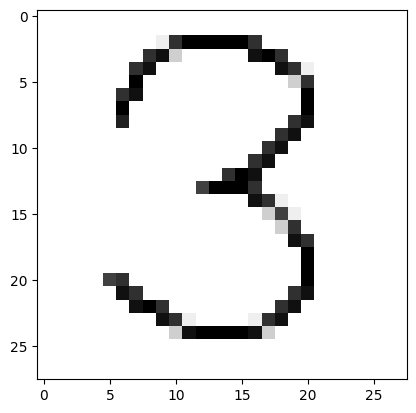

In [ ]:
name = 'A:/20(' + str(1) + ').png'
image = mpimg.imread(name)
image = image[:,:,0]
queryVector = np.array(image/255).reshape(784)
plt.imshow(image, cmap='gray')
print(NN.query(queryVector)[NN.query(queryVector).argmax()])
print("MSE = ", np.mean(np.square(1 - NN.query(queryVector)[3])))